# Prediction using Decision Tree Algorithm

### Goal - To predict right class of species using Decision Tree Algorithm and visualize it graphically

In [1]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib notebook

# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')


In [2]:
!cat Iris.csv

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa
11,5.4,3.7,1.5,0.2,Iris-setosa
12,4.8,3.4,1.6,0.2,Iris-setosa
13,4.8,3.0,1.4,0.1,Iris-setosa
14,4.3,3.0,1.1,0.1,Iris-setosa
15,5.8,4.0,1.2,0.2,Iris-setosa
16,5.7,4.4,1.5,0.4,Iris-setosa
17,5.4,3.9,1.3,0.4,Iris-setosa
18,5.1,3.5,1.4,0.3,Iris-setosa
19,5.7,3.8,1.7,0.3,Iris-setosa
20,5.1,3.8,1.5,0.3,Iris-setosa
21,5.4,3.4,1.7,0.2,Iris-setosa
22,5.1,3.7,1.5,0.4,Iris-setosa
23,4.6,3.6,1.0,0.2,Iris-setosa
24,5.1,3.3,1.7,0.5,Iris-setosa
25,4.8,3.4,1.9,0.2,Iris-setosa
26,5.0,3.0,1.6,0.2,Iris-setosa
27,5.0,3.4,1.6,0.4,Iris-setosa
28,5.2,3.5,1.5,0.2,Iris-setosa
29,5.2,3.4,1.4,0.2,Iris-setosa
30,4.7,3.2,1.6,0.2,Iris-setosa
31,4.8,3.1,1.6

In [3]:
# reading the dataset 
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Cleaning the data

In [4]:
# Removing the na values if any
df.dropna()
df.shape

(150, 6)

In [5]:
# Removing duplicates if any
df.drop_duplicates()
df.shape

(150, 6)

In [6]:
# Changing the index
df.set_index('Id').head()

# Changing the column names
df.columns = ['Id','SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
df.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# dropping the id column
df1=df.drop('Id', axis =1)

# describe the data
df1.describe()



,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualization

<IPython.core.display.Javascript object>


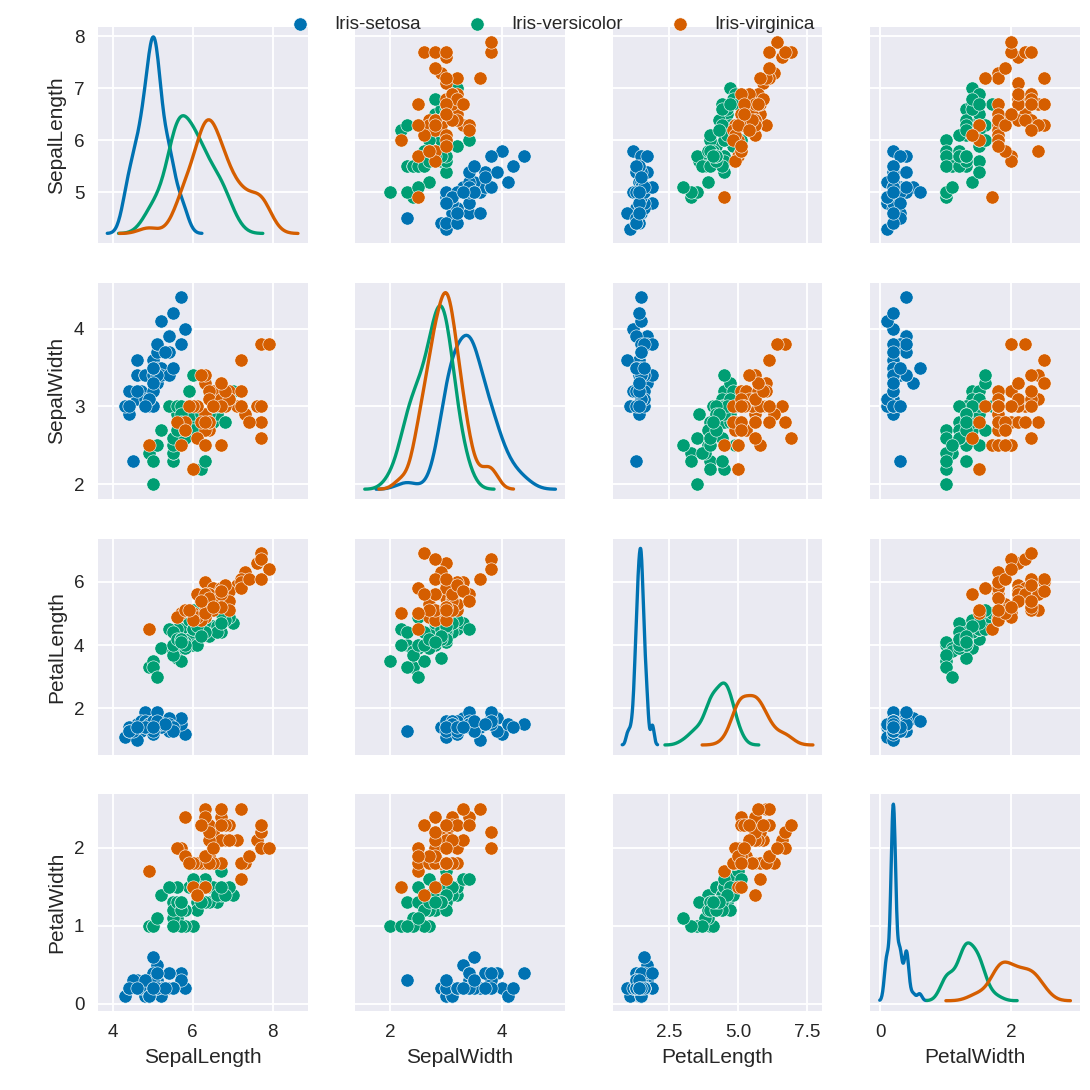

In [10]:
# plotting all pairplot to see how features are related 
g=sns.pairplot(df1, hue='Species', diag_kind='kde', size=2);

# Adjusting the legend
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels = labels,loc='upper center',ncol=3)
g._legend.remove()

<IPython.core.display.Javascript object>


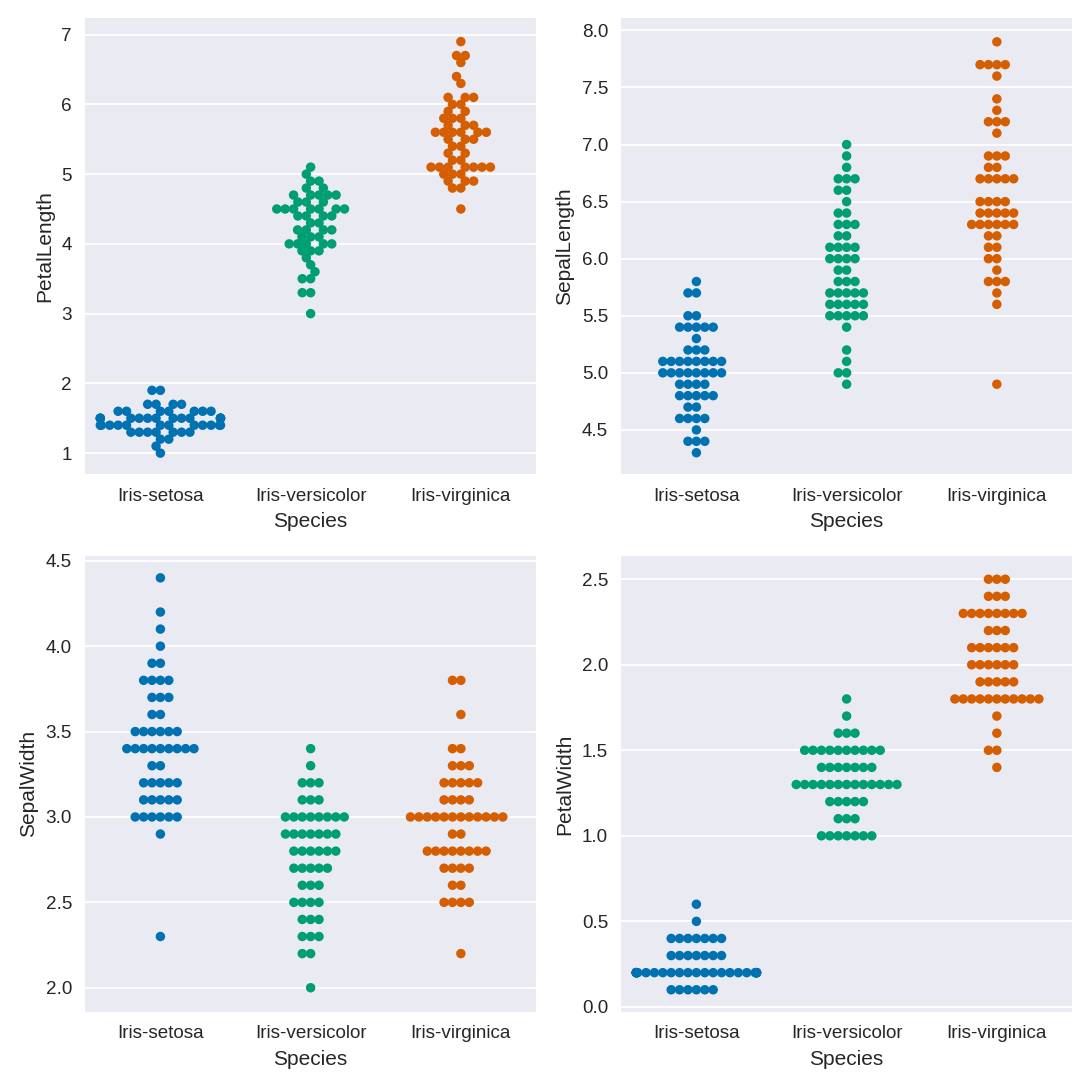

In [11]:
# plotting swarmplot
figure=plt.figure(figsize=(8,8))
plt.subplot(221)
sns.swarmplot('Species', 'PetalLength', data=df);
plt.subplot(222)
sns.swarmplot('Species', 'SepalLength', data=df);
plt.subplot(223)
sns.swarmplot('Species', 'SepalWidth', data=df);
plt.subplot(224)
sns.swarmplot('Species', 'PetalWidth', data=df);

# Setting up the space between the subplots
figure.tight_layout(pad=1.0)


** From the following visualization, we can see that Petal Length  and Petal Width is very different in all the species but Sepal Length and Sepal Width is not different**

### Preparing the data 

In [12]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

# Attributes
X= df1[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

# Label
y=df1[['Species']]

# splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)


### Training the Algorithm

In [13]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


** Using the max_depth parameter to increase the accuracy and prevent Overfitting**

In [14]:
# Specifying max_depth parameter max_depth =3
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


In [15]:
# Changing the max_depth parameter now max_depth =4
clf2 = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.97


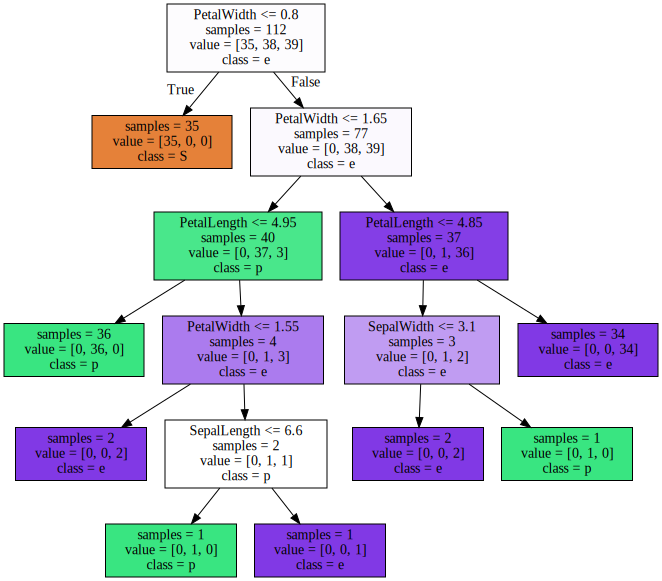

In [16]:
# Visualizing the decision tree 
plot_decision_tree(clf,['SepalLength','SepalWidth','PetalLength','PetalWidth'] , 'Species')

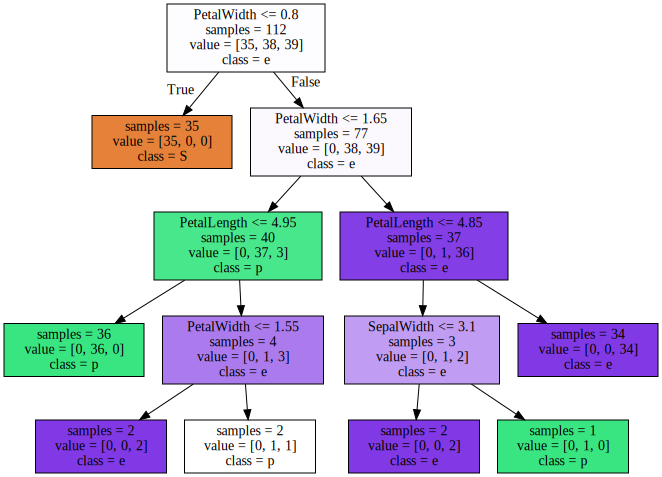

In [17]:
# Visualizing the decison tree on the second one
plot_decision_tree(clf2,['SepalLength','SepalWidth','PetalLength','PetalWidth'] , 'Species')

<IPython.core.display.Javascript object>


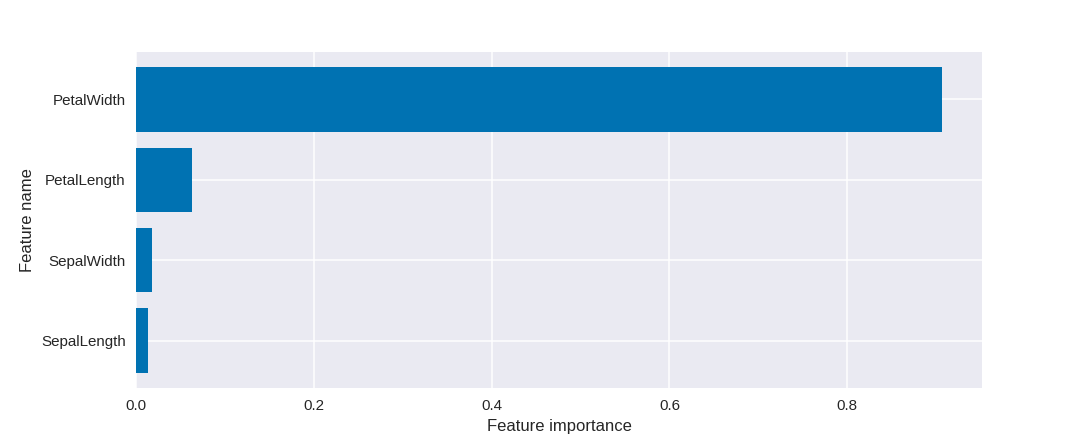

Feature importances: [ 0.01340675  0.01787567  0.06251049  0.90620709]


In [18]:
# Specifying the value of importance of features in classifying the species
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf,['SepalLength','SepalWidth','PetalLength','PetalWidth'] )
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

** We can see that Petal Width is the most important feature in classifying the species.**

### Making the predictions

In [19]:
# predicting 
X_predict=clf.predict(X_test)

In [20]:
y=y_test['Species']
new = pd.Series(y)
new.index=range(38)
new

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5      Iris-virginica
6     Iris-versicolor
7         Iris-setosa
8      Iris-virginica
9     Iris-versicolor
10    Iris-versicolor
11        Iris-setosa
12    Iris-versicolor
13    Iris-versicolor
14     Iris-virginica
15        Iris-setosa
16    Iris-versicolor
17     Iris-virginica
18     Iris-virginica
19        Iris-setosa
20     Iris-virginica
21     Iris-virginica
22     Iris-virginica
23    Iris-versicolor
24        Iris-setosa
25     Iris-virginica
26     Iris-virginica
27    Iris-versicolor
28    Iris-versicolor
29    Iris-versicolor
30        Iris-setosa
31        Iris-setosa
32     Iris-virginica
33    Iris-versicolor
34        Iris-setosa
35        Iris-setosa
36    Iris-versicolor
37        Iris-setosa
Name: Species, dtype: object